# Проект по анализу данных о школьниках

Необходимо выяснить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

###  Описание датасета

1. **school** — аббревиатура школы, в которой учится ученик 
2. **sex** — пол ученика ('F' - женский, 'M' - мужской) 
3. **age** — возраст ученика (от 15 до 22) 
4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом) 
5. **famsize** — размер семьи('LE3' <= 3, 'GT3' > 3) 
6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) 
7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 
8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 
9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) 
10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) 
11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) 
12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое) 
13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) 
14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) 
15. **failures** — количество внеучебных неудач (n, если 1<=n<3, иначе 0) 
16. **schoolsup** — дополнительная образовательная поддержка (yes или no) 
17. **famsup** — семейная образовательная поддержка (yes или no) 
18. **paid** — дополнительные платные занятия по математике (yes или no) 
19. **activities** — дополнительные внеучебные занятия (yes или no) 
20. **nursery** — посещал детский сад (yes или no) 
21. **higher** — хочет получить высшее образование (yes или no) 
22. **internet** — наличие интернета дома (yes или no) 
23. **romantic** — в романтических отношениях (yes или no) 
24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) 
25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого) 
26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) 
27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) 
28. **absences** — количество пропущенных занятий 
29. **score** — баллы по госэкзамену по математике

## Этапы выполнения проекта

1. Загрузка и первичный отсмотр данных.
2. Предобработка данных.
3. Анализ номинативных переменных.
4. Коррелляционный анализ, наличие выбросов и аномалий.
5. Отбор данных, пригодных для дальнейшего построения модели.
6. Основные итоги работы.

# Импорт библиотек и загрузка данных

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50) 

In [252]:
df = pd.read_csv('stud_math.csv')

In [253]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Первичный осмотр данных

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [255]:
df['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

In [256]:
df['studytime'].value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [257]:
df.drop("studytime, granular", axis=1, inplace=True)
# Удалим один из двух полностью коррелирующих признаков

### __Результат первичного осмотра данных:__ 

В таблице 395 записей с 29 признаками. Многие признаки содержат небольшое число пропусков.

Признаки:
*численные* - age, absences, score;  
*бинарные* - school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic;   
*категориальные* - Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, studytime_granular, famrel, freetime, goout, health.

**Целевым признаком** является `score`.

In [258]:
target_name = 'score'

## Функции для анализа данных:

In [259]:
def allocation(df_col):
    # Анализ признака (df_col) на содержание и количество пропусков.

    n = len(pd.DataFrame(df[df_col].value_counts()))
    gap = int(pd.DataFrame(df[df_col]).isna().sum())
    return display(pd.DataFrame(df[df_col].value_counts())),\
    print(f"В столбце '{df_col}' имеется {n} уникальных значений, количество пропусков: {gap}.")

In [260]:
def outliers(df_col):
    # Определение наличия выбросов и их границ.

    q1 = df[df_col].quantile(0.25)
    q3 = df[df_col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)

    print(f"25-й процентиль: {q1}, 75-й процентиль: {q3}, IQR: {iqr}, Границы выбросов: [{low}, {high}]")
    print(f"Количество выбросов в признаке '{df_col}':\
    {((df[df_col] < q1 - 1.5 * iqr) | (df[df_col] > q3 + 1.5 * iqr)).sum()}")

In [261]:
def remove_outliers(df_col):
    '''
    Удаление найденных выбросов (построчно).
    Данную функцию можно применять, если нет возможности заменить выбросы
    с использованием расчётных мер описательной статистики.    
    '''
    
    q1 = df[df_col].quantile(0.25)
    q3 = df[df_col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)

    out_df = df.loc[(df[df_col] > low) & (df[df_col] < high)]
    return out_df  

In [262]:
def get_boxplot(df_col):
    # Функция выводит boxplot распределения анализируемого признака.
    
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=df_col, y='score', data=df, fliersize=8, ax=ax)
    ax.set_title(df_col, fontsize=22)
    plt.show();

In [263]:
def fill_mode(df_col):
    # Функция заполняет пропуски модой.

    df[df_col].fillna(df[df_col].mode()[0], inplace=True)

In [264]:
def numerical_features(item_name, target_name=target_name, n_bins=100):
    '''
    Функция для анализа численных признаков.

    Рисует несколько графиков:
    - boxplot
    - distplot
    - диаграмму рассеяния (scatterplot)

    Вычисляет базовые статистические показатели, определяет количество пропущенных значений.        
    '''

    if item_name != target_name:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))

    # boxplot
    df.boxplot(column=item_name, ax=axes[0])
    axes[0].set_title(item_name, fontsize=22)

    # distplot
    sns.distplot(df[item_name], bins=n_bins,
                 kde=True, ax=axes[1], vertical=True)
    axes[1].set_title(item_name, fontsize=22)
    plt.xticks(rotation=45)

    # scatterplot
    if item_name != target_name:
        axes[2] = sns.scatterplot(x=item_name, y=target_name, data=df)

    print(pd.DataFrame(df[item_name].describe()).T, "\n")
    print(
        f"В столбце '{item_name}' имеется {df[item_name].isna().sum()} пропусков.\n\n")

In [265]:
def ordinal_features(item_name):
    '''
    Функция для анализа упорядоченных категориальных признаков.

    Рисует несколько графиков:
    - barplot
    - boxplot
    - kdeplot

    Определяет количество пропущенных значений.
    '''

    fig, axes = plt.subplots(1, 3, figsize=(15, 10))

    # barplot
    bar_data = df.groupby(item_name)[item_name].count()
    br_plot = sns.barplot(x=bar_data.index, y=bar_data, ax=axes[0])
    br_plot.set_xticklabels(bar_data.index, rotation=45)
    axes[0].set_title(item_name, fontsize=22)

    # boxplots
    bx_plot = sns.boxplot(x=item_name, y=target_name, data=df, ax=axes[1])
    bx_plot.set_xticklabels(bar_data.index, rotation=45)
    plt.xticks(rotation=45)
    axes[1].set_title(item_name, fontsize=22)

    # kdeplots
    values = df[item_name].value_counts()
    for value in values.index:
        sns.kdeplot(df[df[item_name] == value][target_name],
                    vertical=True, ax=axes[2], label=value)
    axes[2].set_title(item_name, fontsize=22)
    axes[2].legend(fontsize=22)

    print(bar_data, "\n")
    print(f"В столбце '{item_name}' {df[item_name].isna().sum()} пропусков.\n\n")

In [266]:
def corr_coeff(item_name, target_name=target_name):
    '''
    Определение коэффициента корреляции Пирсона
    между двумя численными признаками датасета.

    item_name - название анализируемого столбца датасета. 
    target_name - название целевого столбца датасета. 
    '''

    corr_coeff = np.array(df[[item_name, target_name]].corr())[0, 1]
    print(f"Коэффициент корреляции Пирсона между признаками '{item_name}' и '{target_name}' составляет {corr_coeff:.4f}.")

In [337]:
def get_stat_dif(df_col):
    '''
    Функция для определения признаков со статистически значимыми отклонениями.
    Представляет собой теста Стьюдента на гипотезу о нулевой разнице параметров 
    распределений итоговой оценки (score) по парам значений из категориальных или 
    порядковых столбцов на уровне доверия 90 % с учетом поправки Бонферрони.
    
    df_col - название столбца датасета. 
    important_for_model - внешний список, собирающий значимые признаки.    
    '''
    
    cols = df.loc[:, df_col].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, df_col] == comb[0], 'score'], 
                     df.loc[df.loc[:, df_col] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', df_col)
            important_for_model.append(df_col)
            break

# Предобработка датасета

## Переименование, удаление, замена

In [268]:
# переименуем для удобства все столбцы, убрав заглавные буквы
df.rename(str.lower, axis='columns', inplace=True)

# для удобства анализа заменим "Yes" и "No" на 0 и 1 соответственно 
df = df.replace({'yes': 0.0, 'no': 1.0})

# приводим к стандарту PEP-8 названия всех столбцов
df.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu',
                'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 
                'school_support', 'family_support', 'paid', 'activities', 'nursery', 'higher', 'internet',
                'romantic', 'family_relations', 'free_time', 'go_out', 'health', 'absences', 'score'
                ]

df.head()

,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,2.0,5.0,4.0,50.0


Проверим наличие пропусков в __целевом признаке__ (`score`).

In [269]:
print(f"Целевой признак имеет {df['score'].isna().sum()} пропущенных значений.")

Целевой признак имеет 6 пропущенных значений.


Доля пропусков в целевом признаке меньше 2%, поэтому мы можем позволить себе удалить их.

In [270]:
df.dropna(subset=['score'], inplace=True)
print(f"После удаления пропусков в целевом признаке, датасет имеет {len(df)} значений.")

После удаления пропусков в целевом признаке, датасет имеет 389 значений.


In [271]:
# проверим наличия дубликатов
print(f"Представленный датасет имеет {df.duplicated().sum()} повторяющихся строк.")

Представленный датасет имеет 0 повторяющихся строк.


In [272]:
# проверяем наличие пропусков
df.isna().sum()

school               0
sex                  0
age                  0
address             15
family_size         27
parents_status      45
mother_edu           3
father_edu          24
mother_job          19
father_job          36
reason              17
guardian            31
travel_time         28
study_time           7
failures            22
school_support       9
family_support      38
paid                39
activities          14
nursery             15
higher              20
internet            34
romantic            31
family_relations    27
free_time            9
go_out               7
health              15
absences            11
score                0
dtype: int64

In [273]:
print(f"Максимальная доля пропущенных значений {df.isna().sum().max()/len(df):.1%}\
 в признаке '{df.isna().sum().idxmax()}'.")

Максимальная доля пропущенных значений 11.6% в признаке 'parents_status'.


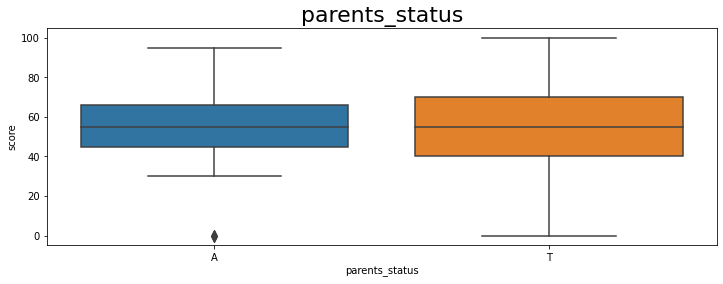

In [274]:
# проверка влияния признака на целевой по классам
get_boxplot('parents_status')

In [275]:
#Удалим признак 'parents_status' как признак с наибольшим числом признаков
#и не имеющий сильного влияния по классам на целевой признак.
df.drop(['parents_status'], inplace=True, axis=1)

## Проверка численных признаков на взаимную корреляцию 

,age,absences,score
age,1.000000,0.096628,-0.155726
absences,0.096628,1.000000,0.065283
score,-0.155726,0.065283,1.000000


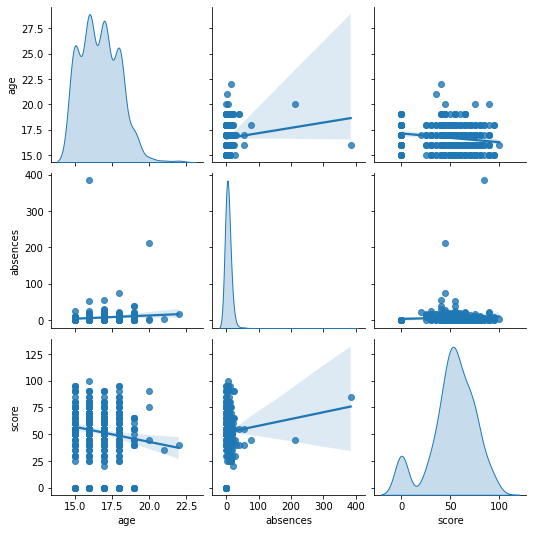

In [276]:
ft_numerical = ['age', 'absences', 'score']

df_fn = df[ft_numerical]
sns.pairplot(df_fn, kind = 'reg', diag_kind='kde', palette='flag')
df_fn.corr()

## _Группировка_ категориальных признаков

In [277]:
ft_list_all = list(df.columns.values)

print(f"В представленном датасете {len(ft_list_all)} признаков для анализа.")

ft_categorical = ft_list_all.copy()
for item in ft_categorical:
    if item in ft_numerical:
        ft_categorical.remove(item)

ft_categorical.pop()    

ft_binary = []
ft_ordinal = []
for name in ft_categorical:
    if (df[name].nunique() <= 2):
        ft_binary.append(name)
    else:
        ft_ordinal.append(name)
        
print(f"Всего {len(ft_categorical)} категориальных признаков, в т.ч. {len(ft_binary)} бинарных и {len(ft_ordinal)} оценочных признаков.")


В представленном датасете 28 признаков для анализа.
Всего 25 категориальных признаков, в т.ч. 12 бинарных и 13 оценочных признаков.


# Анализ признаков 

## Численные признаки

     count       mean       std   min   25%   50%   75%   max
age  389.0  16.673522  1.265662  15.0  16.0  17.0  18.0  22.0 

В столбце 'age' имеется 0 пропусков.


          count      mean        std  min  25%  50%  75%    max
absences  378.0  7.320106  23.615525  0.0  0.0  4.0  8.0  385.0 

В столбце 'absences' имеется 11 пропусков.


       count       mean        std  min   25%   50%   75%    max
score  389.0  52.262211  22.919022  0.0  40.0  55.0  70.0  100.0 

В столбце 'score' имеется 0 пропусков.




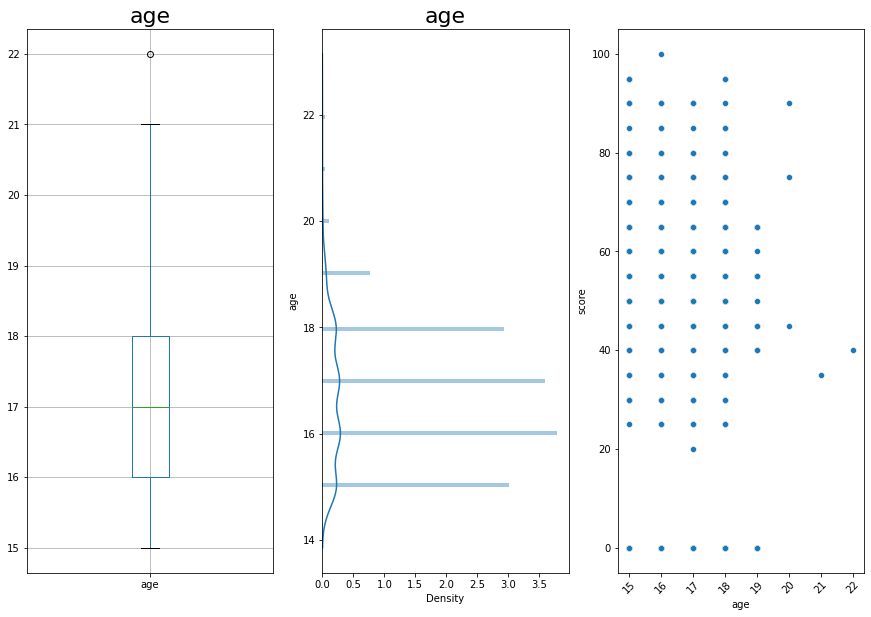

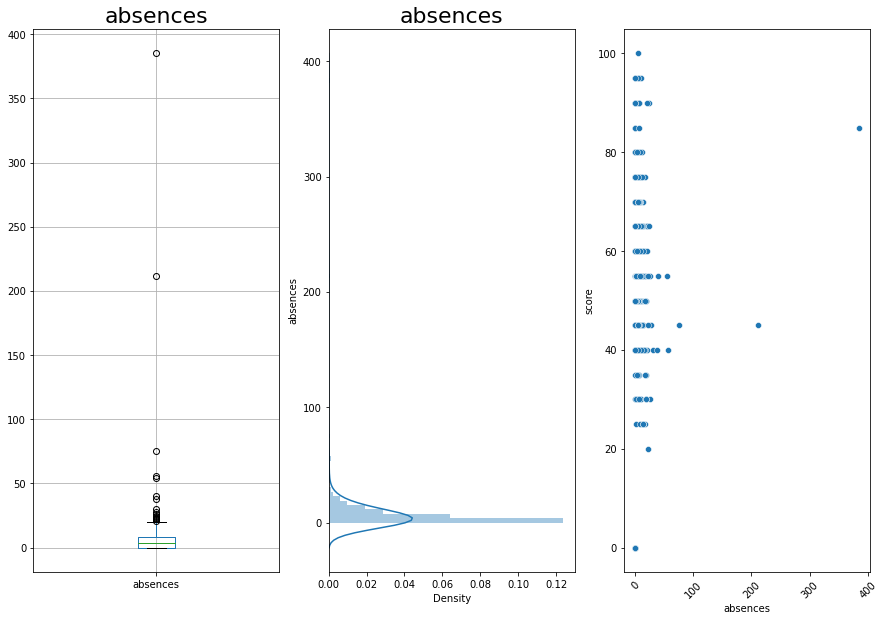

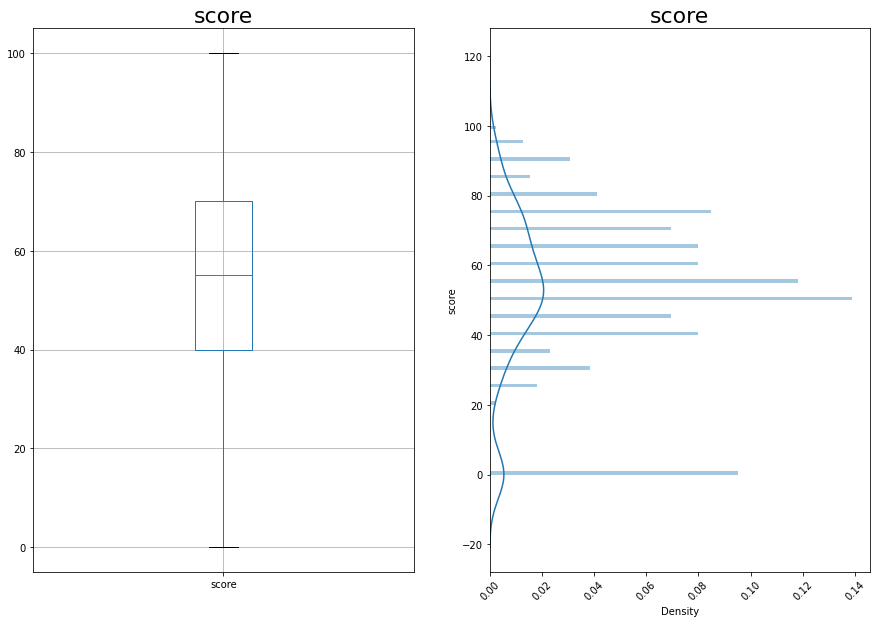

In [278]:
for col in ft_numerical:
    numerical_features(col)

### Признак age

In [279]:
allocation('age')

,age
16,103
17,98
15,82
18,80
19,21
20,3
21,1
22,1


В столбце 'age' имеется 8 уникальных значений, количество пропусков: 0.


(None, None)

In [280]:
outliers('age')

25-й процентиль: 16.0, 75-й процентиль: 18.0, IQR: 2.0, Границы выбросов: [13.0, 21.0]
Количество выбросов в признаке 'age':    1


In [281]:
display(pd.DataFrame(df.groupby(['age']).score.agg(['count', 'mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15,82,56.280488,95.0,0.0,55.0
16,103,55.194175,100.0,0.0,55.0
17,98,51.377551,90.0,0.0,55.0
18,80,48.312500,95.0,0.0,50.0
19,21,40.238095,65.0,0.0,45.0
20,3,70.000000,90.0,45.0,75.0
21,1,35.000000,35.0,35.0,35.0
22,1,40.000000,40.0,40.0,40.0


In [282]:
corr_coeff('age', 'score')

Коэффициент корреляции Пирсона между признаками 'age' и 'score' составляет -0.1557.


Интерсна взаимосвязь возраста учеников с результами аттестации с учётом школы и пола экзаменуемых:

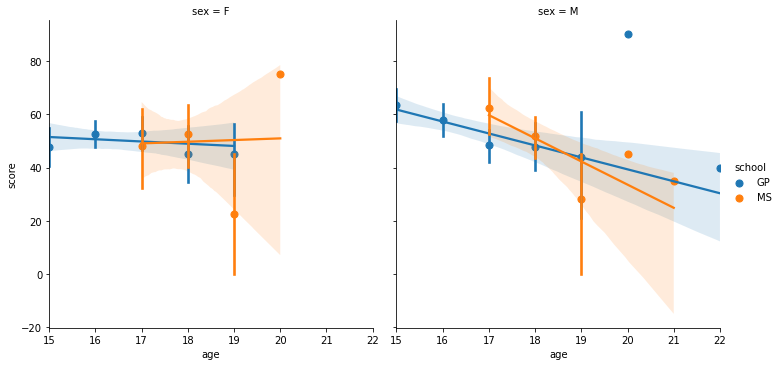

In [283]:
sns.lmplot(x="age", y="score", hue="school", col="sex", data=df, x_estimator=np.mean);

### Признак absences

In [284]:
outliers('absences')

25-й процентиль: 0.0, 75-й процентиль: 8.0, IQR: 8.0, Границы выбросов: [-12.0, 20.0]
Количество выбросов в признаке 'absences':    17


In [285]:
# уберём выброс, который вероятно является ошибкой ввода
df['absences'].replace(385, 38, inplace=True)

In [286]:
# заполним пропуски
df['absences'].fillna(df['absences'].mean(), axis=0, inplace=True)

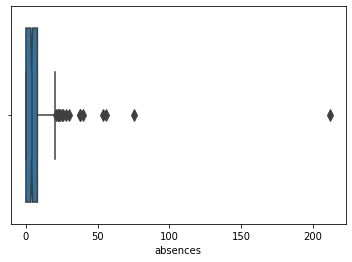

In [287]:
sns.boxplot(x='absences', data=df, fliersize=8, linewidth=1.5, notch=True);

In [288]:
# посмотрим на выборку учеников с большим количеством пропусков
df[df.absences > 40].sort_values('absences')

,school,sex,age,address,family_size,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
74,GP,F,16,U,GT3,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,1.0,56.0,40.0
276,GP,F,18,R,GT3,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,5.0,4.0,4.0,212.0,45.0


In [289]:
# удаление из выборки записей с количеством пропусков более 40
df = df.loc[(df['absences'] <= 40)]

In [290]:
corr_coeff('absences', 'score')

Коэффициент корреляции Пирсона между признаками 'absences' и 'score' составляет 0.0751.


### Целевой признак score

In [291]:
print(f"Выборка содержит {len(df[df.score == 0].index)/len(df.index):.2%} учеников с нулевой оценкой.")

Выборка содержит 9.61% учеников с нулевой оценкой.


In [292]:
outliers('score')

25-й процентиль: 40.0, 75-й процентиль: 70.0, IQR: 30.0, Границы выбросов: [-5.0, 115.0]
Количество выбросов в признаке 'score':    0


In [293]:
# создание выборки без нулевых значений
df1 = df.score.apply(lambda x: x if x > 0 else np.nan)

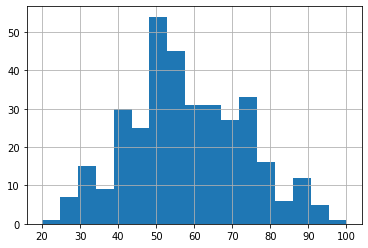

In [294]:
df1.hist(bins = 17);

In [295]:
df1.describe()

count    348.000000
mean      57.887931
std       16.236067
min       20.000000
25%       48.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [296]:
# определение границ выбросов в "безнулевой" выборке
q1 = df1.describe()['25%']
q3 = df1.describe()['75%']
iqr = q3 - q1
print(f"Границы выбросов: [{q1 - 1.5*iqr}, {q3 + 1.5*iqr}].")

Границы выбросов: [16.875, 101.875].


Без нулевых оценок график имеет нормальное распределение. Предположительно, оценка 0 в датасете соответствует тому, что результат экзамена был аннулирован в силу каких-то причин. Поскольку будущая модель должна предсказывать оценку сдающих экзамен учеников, а не причины их неявки или аннулирования результатов, удалим из датасета все записи с оценкой 0. 

In [297]:
df = df.loc[(df['score'] != 0.0)]

In [298]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 394
Columns: 28 entries, school to score
dtypes: float64(19), int64(1), object(8)
memory usage: 78.8+ KB


## Бинарные категориальные признаки

In [299]:
for col in ft_binary:
    allocation(col)

,school
GP,308
MS,40


В столбце 'school' имеется 2 уникальных значений, количество пропусков: 0.


,sex
F,179
M,169


В столбце 'sex' имеется 2 уникальных значений, количество пропусков: 0.


,address
U,262
R,72


В столбце 'address' имеется 2 уникальных значений, количество пропусков: 14.


,family_size
GT3,226
LE3,98


В столбце 'family_size' имеется 2 уникальных значений, количество пропусков: 24.


,school_support
1.0,292
0.0,47


В столбце 'school_support' имеется 2 уникальных значений, количество пропусков: 9.


,family_support
0.0,193
1.0,120


В столбце 'family_support' имеется 2 уникальных значений, количество пропусков: 35.


,paid
1.0,168
0.0,144


В столбце 'paid' имеется 2 уникальных значений, количество пропусков: 36.


,activities
0.0,170
1.0,166


В столбце 'activities' имеется 2 уникальных значений, количество пропусков: 12.


,nursery
0.0,269
1.0,67


В столбце 'nursery' имеется 2 уникальных значений, количество пропусков: 12.


,higher
0.0,317
1.0,12


В столбце 'higher' имеется 2 уникальных значений, количество пропусков: 19.


,internet
0.0,271
1.0,48


В столбце 'internet' имеется 2 уникальных значений, количество пропусков: 29.


,romantic
1.0,217
0.0,102


В столбце 'romantic' имеется 2 уникальных значений, количество пропусков: 29.


### Заполнение пропущенных значений

In [300]:
for col in ft_binary:
    fill_mode(col)

## Оценочные категориальные признаки

### Анализ и заполнение пропусков

In [301]:
print(ft_ordinal)

['mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 'family_relations', 'free_time', 'go_out', 'health']


mother_edu
0.0      3
1.0     47
2.0     87
3.0     84
4.0    125
Name: mother_edu, dtype: int64 

В столбце 'mother_edu' 2 пропусков.




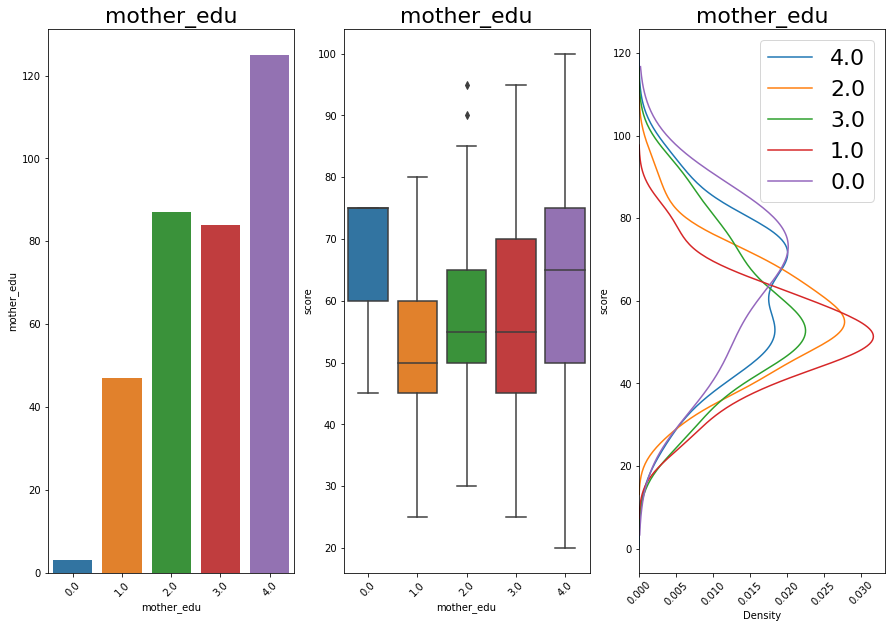

In [302]:
ordinal_features('mother_edu')

In [303]:
df.mother_edu.fillna(df.mother_edu.median(), inplace=True)

father_edu
0.0      2
1.0     65
2.0     92
3.0     87
4.0     80
40.0     1
Name: father_edu, dtype: int64 

В столбце 'father_edu' 21 пропусков.




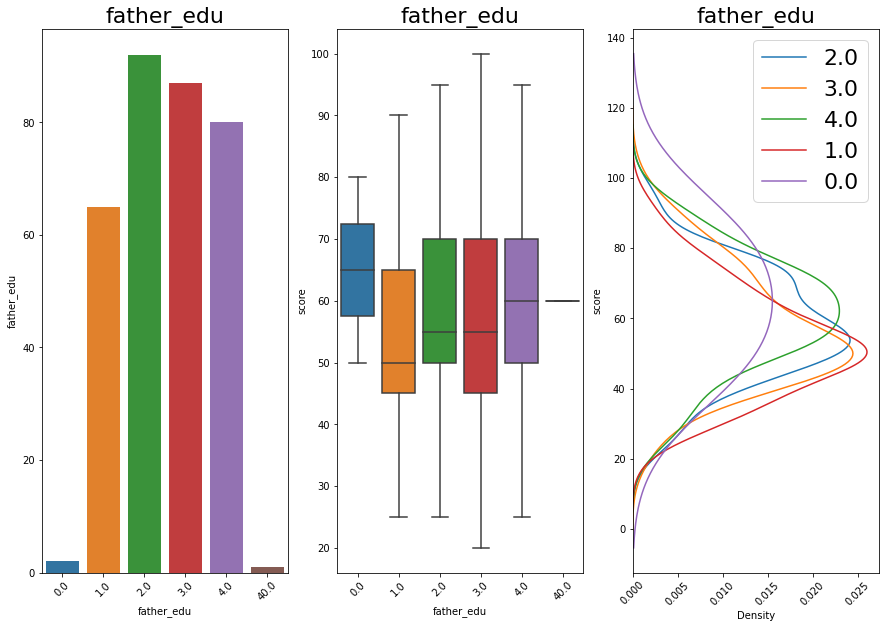

In [304]:
ordinal_features('father_edu')

In [305]:
# исправляем ошибку ввода
df.loc[df.father_edu == 40.0, 'father_edu'] = 4.0

# заполняем пропуски
df.father_edu.fillna(df.father_edu.median(), inplace=True)

mother_job
at_home      49
health       30
other       112
services     89
teacher      51
Name: mother_job, dtype: int64 

В столбце 'mother_job' 17 пропусков.




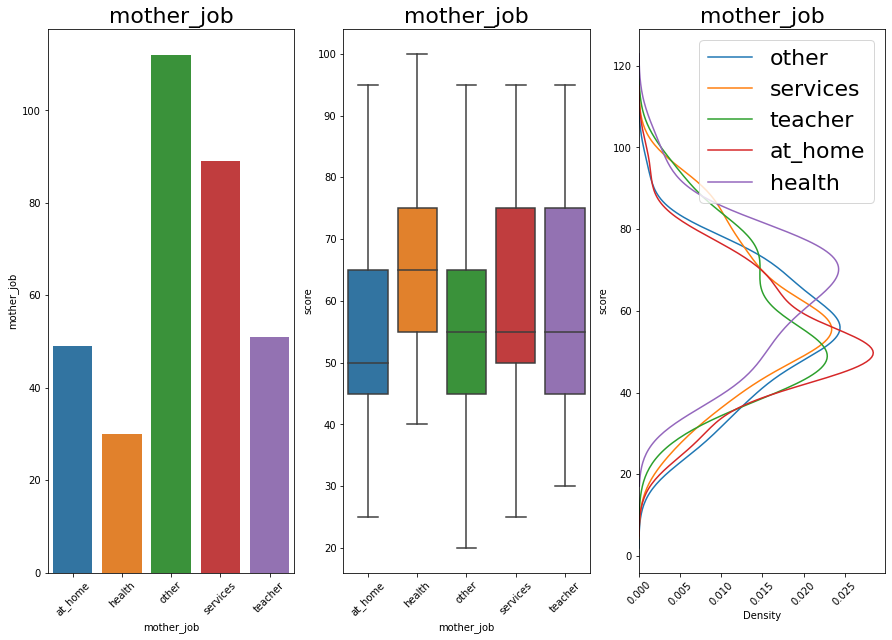

In [306]:
ordinal_features('mother_job')

In [307]:
df.mother_job.fillna(df.mother_job.mode()[0], inplace=True)

father_job
at_home      14
health       15
other       175
services     86
teacher      26
Name: father_job, dtype: int64 

В столбце 'father_job' 32 пропусков.




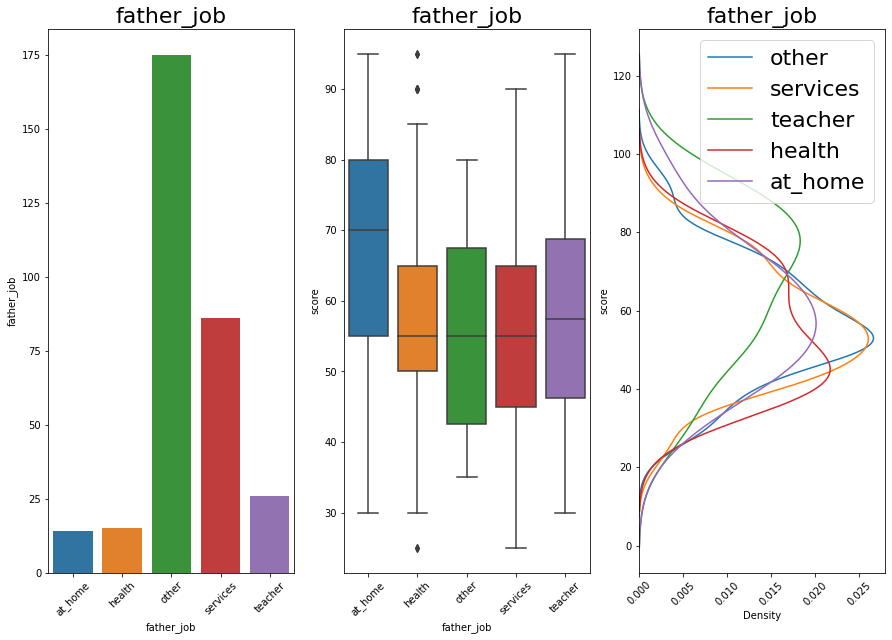

In [308]:
ordinal_features('father_job')

In [309]:
df.father_job.fillna(df.father_job.mode()[0], inplace=True)

reason
course        118
home           87
other          33
reputation     95
Name: reason, dtype: int64 

В столбце 'reason' 15 пропусков.




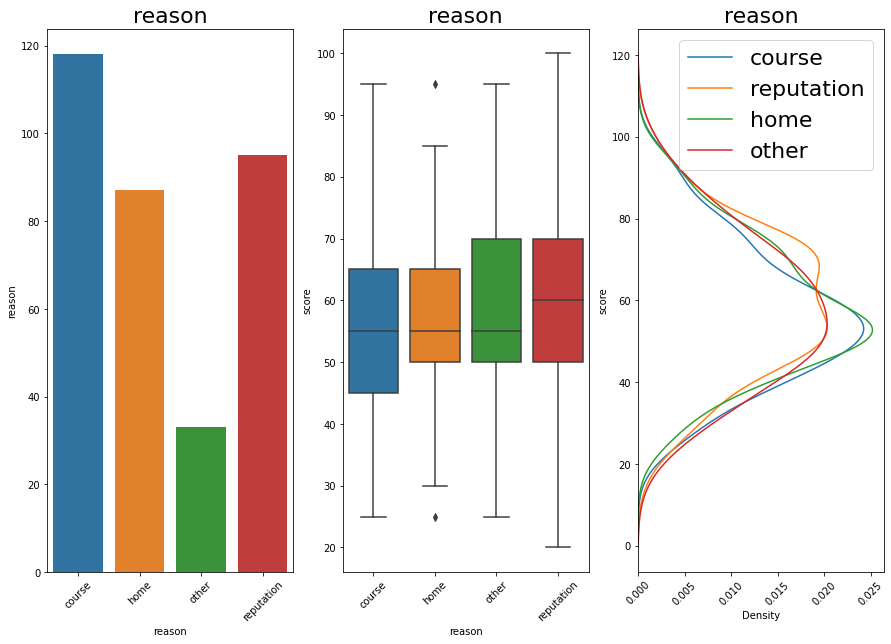

In [310]:
ordinal_features('reason')

In [311]:
df.reason.fillna('unknown', inplace=True)

guardian
father     78
mother    222
other      20
Name: guardian, dtype: int64 

В столбце 'guardian' 28 пропусков.




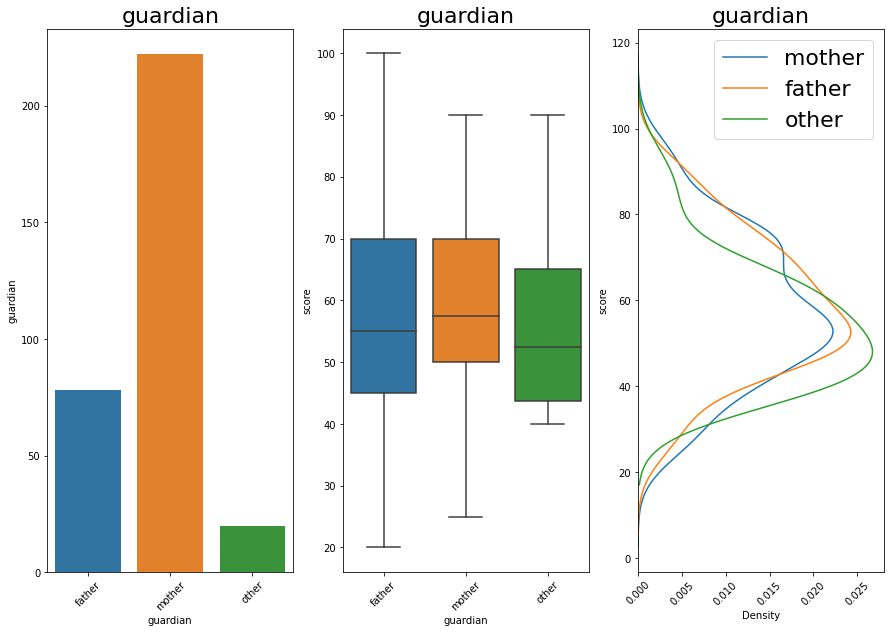

In [312]:
ordinal_features('guardian')

In [313]:
df.guardian.fillna('unknown', inplace=True)

travel_time
1.0    216
2.0     85
3.0     17
4.0      7
Name: travel_time, dtype: int64 

В столбце 'travel_time' 23 пропусков.




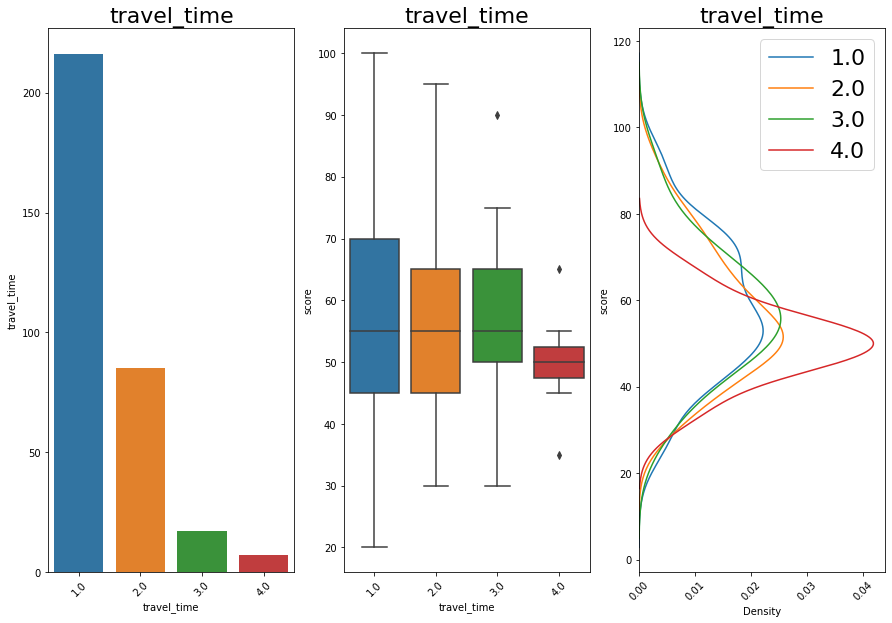

In [314]:
ordinal_features('travel_time')

In [315]:
pd.DataFrame(df.groupby(['address']).travel_time.agg(['count', 'mean', 'median']))

,count,mean,median
address,,,
R,67,1.791045,2.0
U,258,1.337209,1.0


In [316]:
# заполнение пропусков одного признака через медиану другого
u_time =  df.groupby('address')['travel_time'].median().loc['U']
r_time =  df.groupby('address')['travel_time'].median().loc['R']

for i in df[df.travel_time.isna()].index:
    if df.address.loc[i] == 'U':
        df.travel_time.loc[i] = u_time
    else:
        df.travel_time.loc[i] = r_time

study_time
1.0     90
2.0    169
3.0     58
4.0     24
Name: study_time, dtype: int64 

В столбце 'study_time' 7 пропусков.




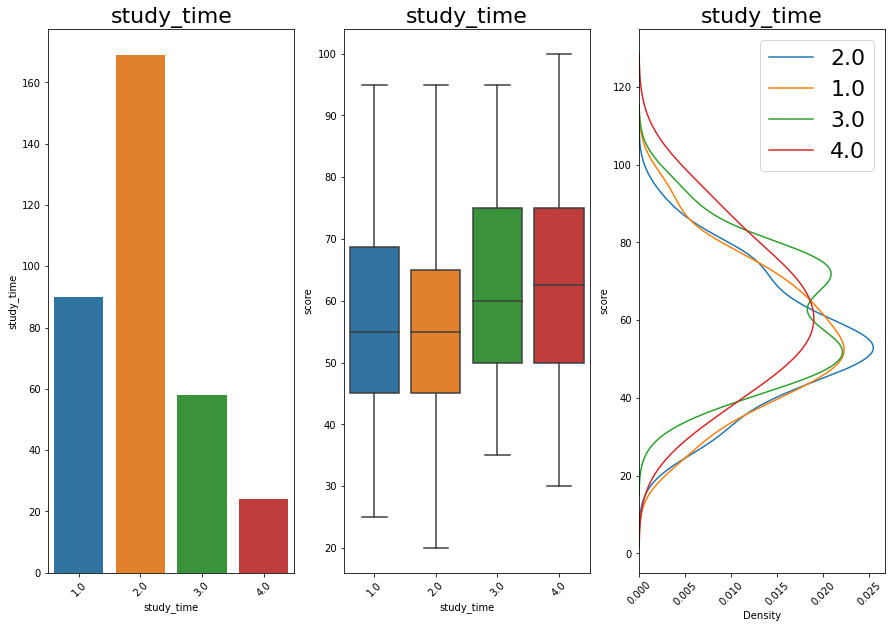

In [317]:
ordinal_features('study_time')

In [318]:
df.study_time.fillna(df.study_time.median(), inplace=True)

failures
0.0    270
1.0     38
2.0     10
3.0     10
Name: failures, dtype: int64 

В столбце 'failures' 20 пропусков.




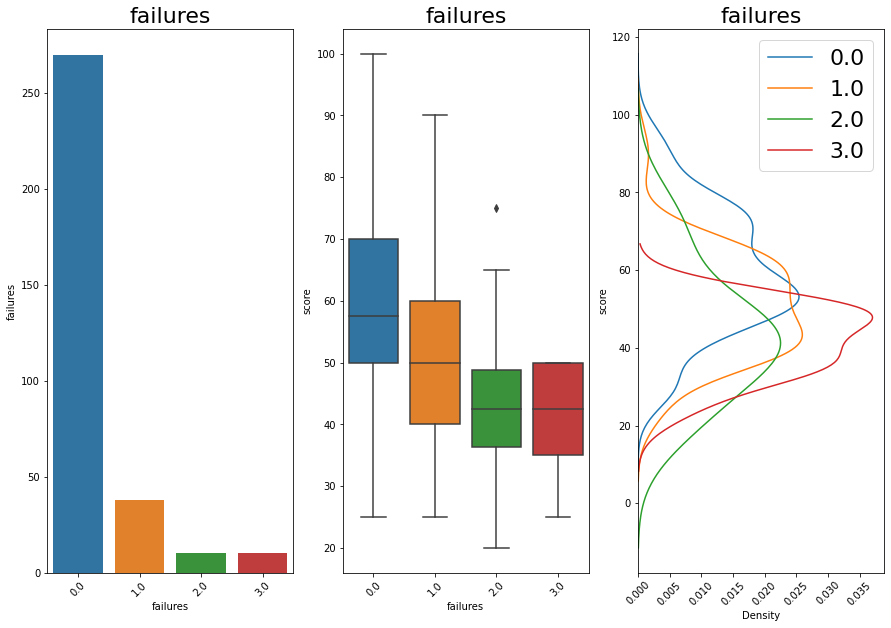

In [319]:
ordinal_features('failures')

Признак описывает количество внеучебных неудач, причём в методологии (n, если 1<=n<3, иначе 0), по всей видимости, есть существенный недочёт: при количестве неудач более 3 признаку присваивается значение 0. Таким образом в классе "0 неудач" находтся и те ученики, которые не имеют неудач, и те, количество неудач которых более 3. В связи с высоким уровнем неопределённости, удалим данный признак.

In [322]:
df.drop('failures', axis=1, inplace=True)

KeyError: "['failures'] not found in axis"

In [323]:
# изменим список, содержащий признак
ft_ordinal.remove('failures')
ft_categorical.remove('failures')

family_relations
-1.0      1
 1.0      6
 2.0     14
 3.0     56
 4.0    162
 5.0     86
Name: family_relations, dtype: int64 

В столбце 'family_relations' 23 пропусков.




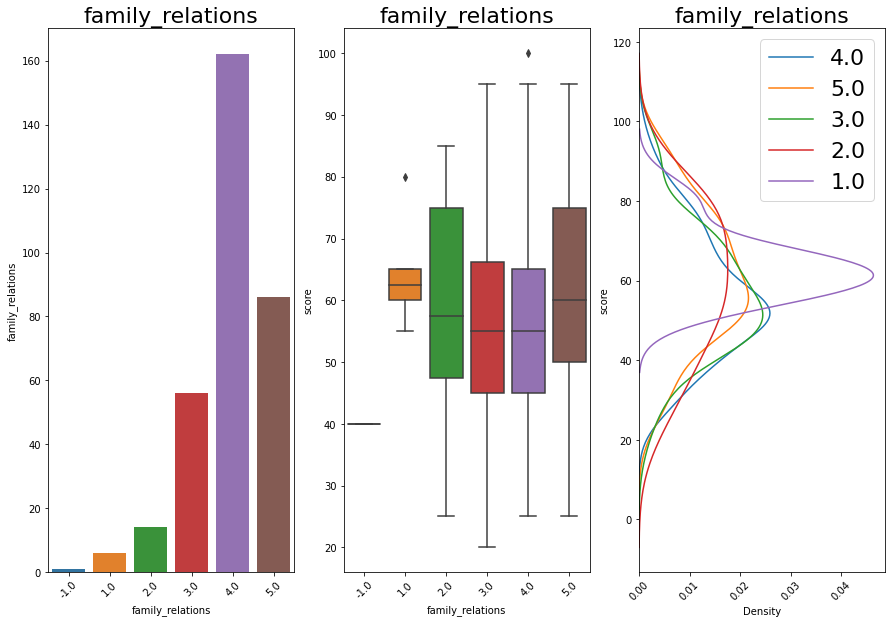

In [325]:
ordinal_features('family_relations')

In [326]:
# исправляем ошибку ввода
df.loc[df.family_relations == -1.0, 'family_relations'] = 1.0

# заполняем пропуски
df.family_relations.fillna(df.family_relations.median(), inplace=True)

free_time
1.0     15
2.0     59
3.0    131
4.0    102
5.0     34
Name: free_time, dtype: int64 

В столбце 'free_time' 7 пропусков.




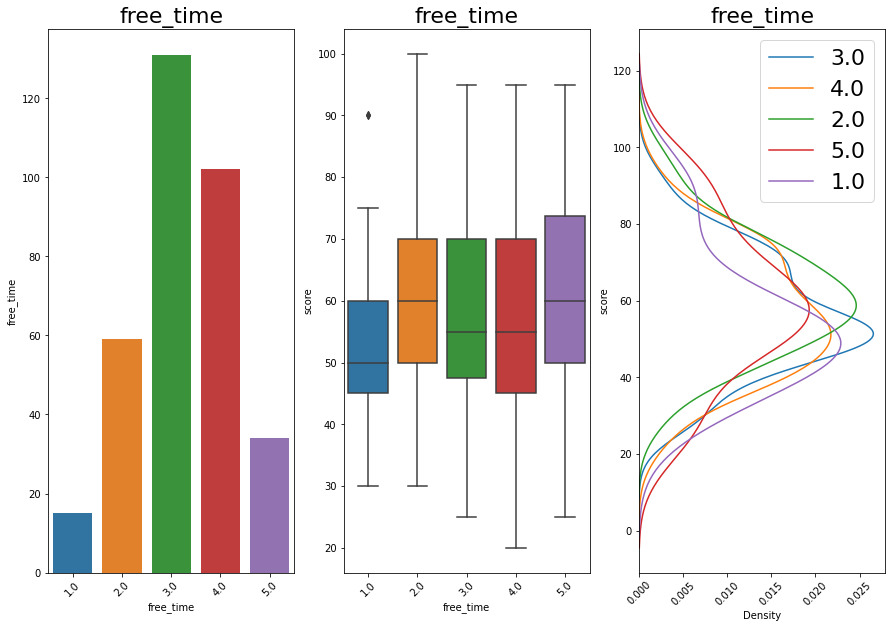

In [327]:
ordinal_features('free_time')

In [328]:
df.free_time.fillna(df.free_time.median(), inplace=True)

go_out
1.0     18
2.0     92
3.0    116
4.0     73
5.0     43
Name: go_out, dtype: int64 

В столбце 'go_out' 6 пропусков.




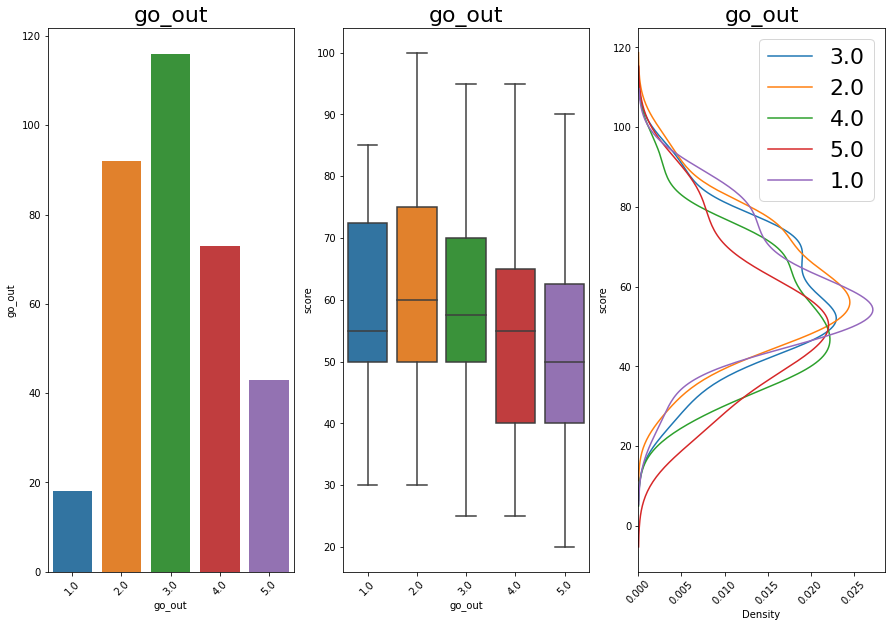

In [329]:
ordinal_features('go_out')

Можно предположить, что отсуствие ответа предполагает отсутствие друзей. В связи с этим, будем заполнять пропуски нулём.

In [330]:
stud.go_out.fillna(0.0, inplace=True)

NameError: name 'stud' is not defined

health
1.0     44
2.0     36
3.0     81
4.0     52
5.0    122
Name: health, dtype: int64 

В столбце 'health' 13 пропусков.




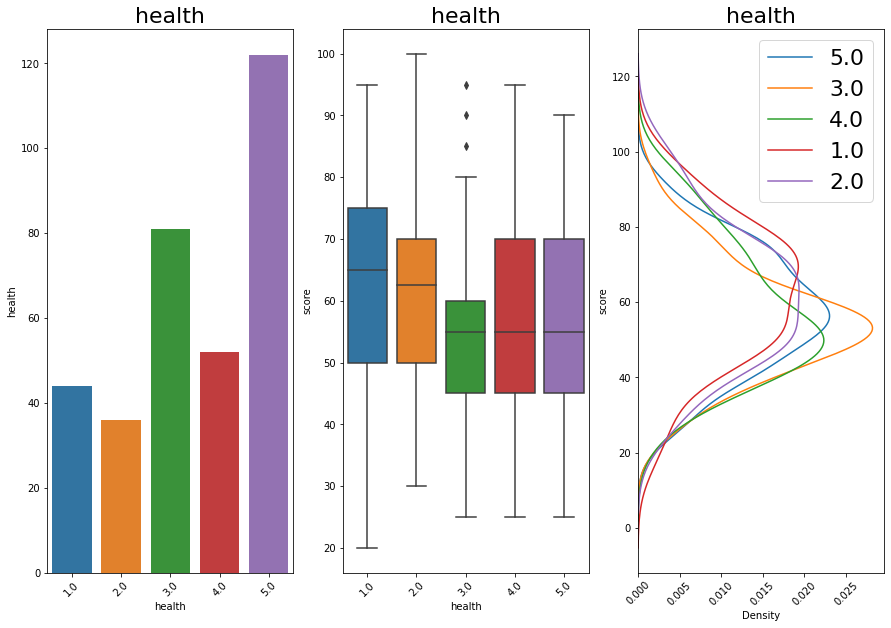

In [331]:
ordinal_features('health')

In [333]:
df.health.fillna(df.health.median(), inplace=True)

 ## Построение тепловой карты для визуализации матрицы корреляции

Важно отметить, что при построении матрицы корреляции полностью игнорируются любые нечисловые столбцы. 

(19.5, -0.5)

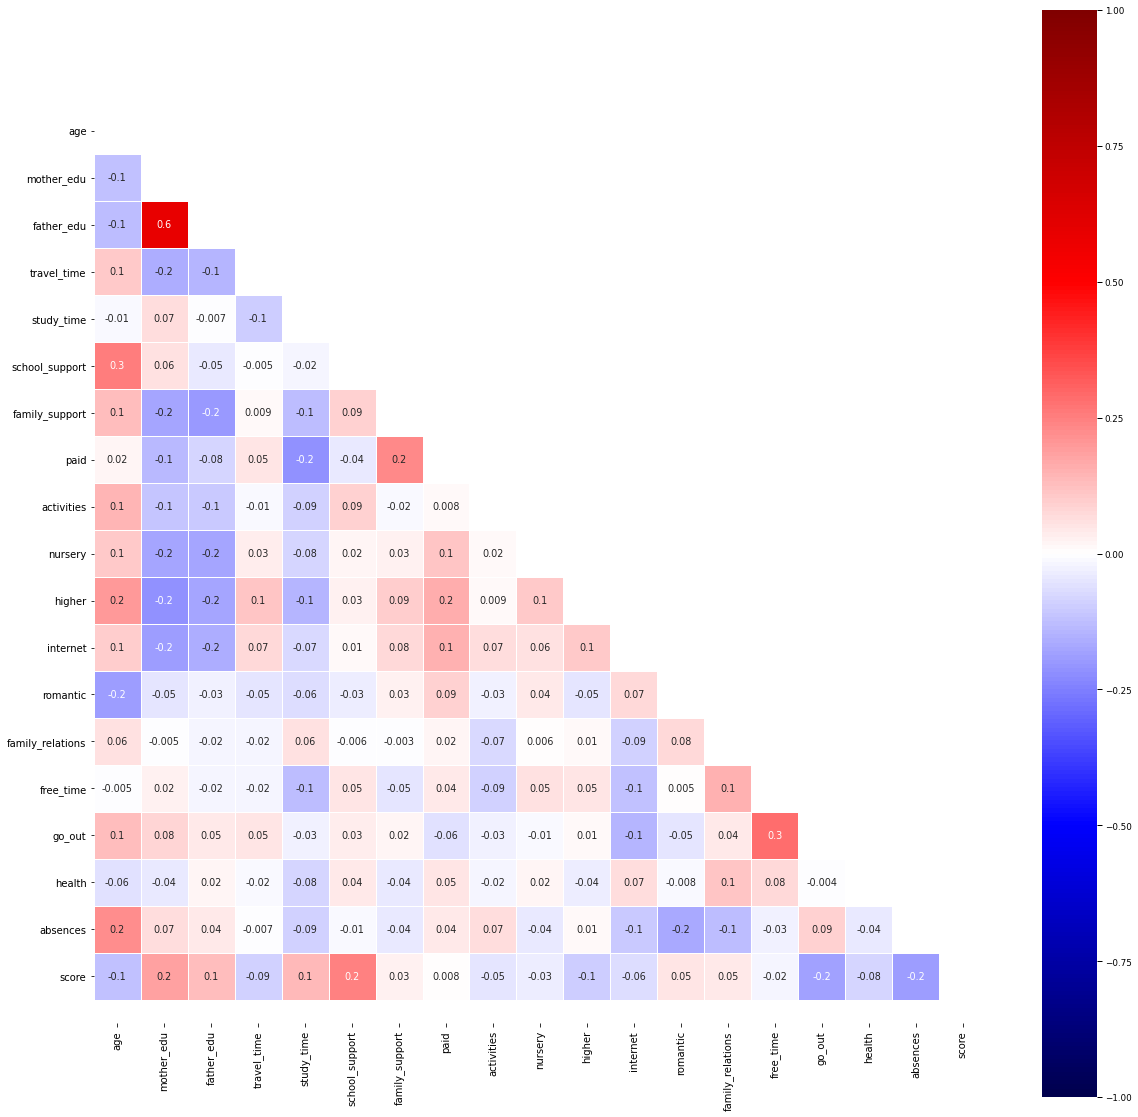

In [335]:
matrix = np.triu(df.corr())

fig, ax = plt.subplots(figsize=(20,20))

sns.set_context('paper')
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap='seismic', annot=True,
            fmt='.1g', linewidths=.5, mask=matrix, square=True)

# исправление отображения heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Тест Стьюдента для всех категориальных признаков

In [339]:
# создание списка важных факторных признаков для будущей модели
important_for_model = []

for col in ft_categorical:
    get_stat_dif(col)  

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки father_edu
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки father_job
Найдены статистически значимые различия для колонки study_time
Найдены статистически значимые различия для колонки school_support
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки go_out


In [340]:
# объединение факторных и численных признаков
important_for_model += ft_numerical

print(f"Рекомендовано использование {len(important_for_model)} признаков для построения модели.")

Рекомендовано использование 13 признаков для построения модели.


# Корректировка датасета для будущего создания модели

In [341]:
final_df = df.loc[:, important_for_model]
final_df.head()

,sex,address,mother_edu,father_edu,mother_job,father_job,study_time,school_support,higher,go_out,age,absences,score
0,F,U,4.0,4.0,at_home,teacher,2.0,0.0,0.0,4.0,18,6.0,30.0
1,F,U,1.0,1.0,at_home,other,2.0,1.0,0.0,3.0,17,4.0,30.0
2,F,U,1.0,1.0,at_home,other,2.0,0.0,0.0,2.0,15,10.0,50.0
3,F,U,4.0,2.0,health,other,3.0,1.0,0.0,2.0,15,2.0,75.0
4,F,U,3.0,3.0,other,other,2.0,1.0,0.0,2.0,16,4.0,50.0


In [342]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 394
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             348 non-null    object 
 1   address         348 non-null    object 
 2   mother_edu      348 non-null    float64
 3   father_edu      348 non-null    float64
 4   mother_job      348 non-null    object 
 5   father_job      348 non-null    object 
 6   study_time      348 non-null    float64
 7   school_support  348 non-null    float64
 8   higher          348 non-null    float64
 9   go_out          342 non-null    float64
 10  age             348 non-null    int64  
 11  absences        348 non-null    float64
 12  score           348 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 46.2+ KB


# Вывод

Для будущего построения модели предлагается использовать 13 признаков: 'age', 'sex', 'address', 'mother_edu', 'father_edu', 'mother_job', 'father_job', 'study_time', 'school_support', 'go_out', 'health', 'absences', 'score'.